## **Importing Libraries**

In [105]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading Data**

In [106]:
data = pd.read_csv('data.csv')

data.head()

,user_id,item_id,rating
0,1,101,4.5
1,1,102,3.5
2,1,103,2.0
3,1,104,3.0
4,1,105,4.0


## **Data Exploration**

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  93 non-null     int64  
 1   item_id  93 non-null     int64  
 2   rating   93 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 2.3 KB


In [108]:
data.describe()

,user_id,item_id,rating
count,93.000000,93.000000,93.000000
mean,5.161290,105.387097,3.516129
std,2.703823,2.911866,0.809091
min,1.000000,101.000000,2.000000
25%,3.000000,103.000000,3.000000
50%,5.000000,105.000000,3.500000
75%,7.000000,108.000000,4.000000
max,10.000000,110.000000,5.000000


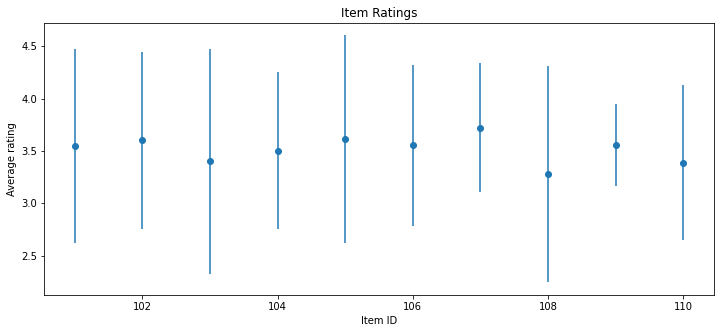

In [109]:
plt.figure(figsize=(12,5))

item_ratings = data.groupby('item_id')['rating'].agg(['mean', 'std'])

plt.errorbar(item_ratings.index, item_ratings['mean'], yerr=item_ratings['std'], fmt='o')

plt.xlabel('Item ID')
plt.ylabel('Average rating')
plt.title('Item Ratings')

plt.show()

## **Data Preprocessing**

In [110]:
matrix = data.pivot(index='user_id', columns='item_id', values='rating').fillna(0)
matrix_sparse = csr_matrix(matrix.values)

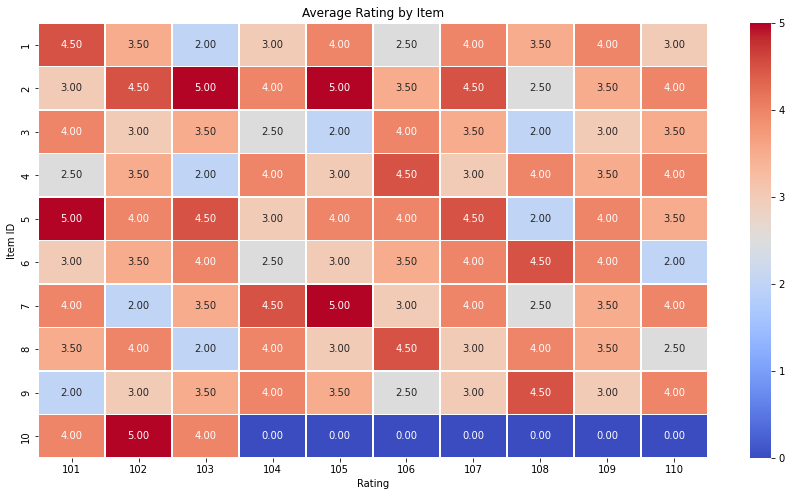

In [111]:

plt.figure(figsize=(15,8))

# Create the heatmap using seaborn
sns.heatmap(matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)

# Set the title and axis labels
plt.title('Average Rating by Item')
plt.xlabel('Rating')
plt.ylabel('Item ID')

# Show the plot
plt.show()

## **Creating Model**

In [112]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['rating'],axis=1), data['rating'], test_size=0.2, random_state=42)

In [113]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(matrix_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

## **Model Inference**

In [114]:
def recommend(user_id, K):

    distances, indices = model_knn.kneighbors(matrix.loc[user_id].values.reshape(1, -1), n_neighbors=K+1)
    item_indices = matrix.columns[indices.flatten()[1:]]
    item_ratings = matrix.loc[indices.flatten()[1:], item_indices].mean(axis=0)
    recommended_items = item_ratings.sort_values(ascending=False)[:K].index.tolist()

    return recommended_items


In [115]:
recommendations = recommend(5, 2)  # recommend 4 items to user with ID 5
print(recommendations)

[102, 103]
